In [63]:
import os
import sys

sys.path.append('../..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = LabelEncoder()
import IPython

import scipy
from scipy.io import wavfile
from pylab import *
orig_df = pd.read_hdf("../../data_extract/features_dataset_2b.h5")
from pymir import *

In [64]:
NUM_PEOPLE = 40
df = orig_df.loc[orig_df['id']<NUM_PEOPLE]

In [65]:
p1 = df.loc[df['id']==0]
p2 = df.loc[df['id']==1]
chlist = ["chroma{}".format(i) for i in range(12)]

In [66]:
mean = np.mean(p1[chlist], axis = 0)
var = np.var(p1[chlist], axis = 0)
tmean = np.mean(p2[chlist], axis = 0)
tvar = np.var(p2[chlist], axis = 0)

In [67]:
def modify_spectrum(spectrum, mean, var, tmean, tvar):
    
    chroma = [0] * 12
    flist = list()
    for index in range(0, len(spectrum)):
        # Assign a frequency value to each bin
        f = index * (spectrum.sampleRate / 2.0) / len(spectrum)
        flist.append(f)
        # Convert frequency to pitch to pitch class
        if f != 0:
            pitch = Pitch.frequencyToMidi(f)
        else:
            pitch = 0
        pitchClass = pitch % 12
        chroma[pitchClass] = chroma[pitchClass] + abs(spectrum[index])
#         print(pitchClass , f)
    
    # Normalize the chroma vector
    norm = sum(chroma)
    chroma = [c / norm for c in chroma]
    
#     spectrum2 = np.array()
    for index2 in range(0, len(spectrum)):
        index = len(spectrum) - index2 - 1
        # Assign a frequency value to each bin
        f = index * (spectrum.sampleRate / 2.0) / len(spectrum)
        # Convert frequency to pitch to pitch class
        if f != 0:
            pitch = Pitch.frequencyToMidi(f)
        else:
            pitch = 0
        pitchClass = pitch % 12
        wt = abs(spectrum[index]) / chroma[pitchClass]
        wt = wt / norm
        
        ## Code for shifting frequency
        shift = 500 #shift by (25441/8000)*500 Hz
        if index > shift:
            spectrum[index] = spectrum[index-shift]
        else:
            spectrum[index] = 0
    return flist
        ## Code for Chroma manipulation
#         spectrum[index] = (spectrum[index] - wt*mean[pitchClass]) /( wt*var[pitchClass])
#         spectrum[index] = (spectrum[index]*wt*tvar[pitchClass]) + wt*tmean[pitchClass]
#         spectrum[index] = (spectrum[index] - wt*mean[pitchClass])
#         spectrum[index] = spectrum[index] + (index * 0.0001)

In [68]:
filepath1 = "../../data/dev-clean/" + p1.iloc[0]['pid']+"/"+p1.iloc[0]['chname']+"/"+p1.iloc[100]['fname']
targetvoice = "../../data/dev-clean/" + p2.iloc[0]['pid']+"/"+p2.iloc[0]['chname']+"/"+p2.iloc[100]['fname']
outputpath = "../../outputs/transformed_voice_demo.wav"
def modify():
    print(filepath1)
    adata = AudioFile.open(filepath1)

    segments = adata.frames(2000000)
        
    spectra = [segment.spectrum() for segment in segments]
    
    plt.plot(spectra[0])
    
    for spectrum in spectra:
        flist = modify_spectrum(spectrum, mean, var, tmean, tvar)
   
    plt.plot(spectra[0])
    
    plt.xticks([0,3000,6000,9000,12000,15000,18000,21000,24000],[0,1,2,3,4,5,6,7,8])
    plt.xlabel("Frequency in KHz")
    plt.ylabel("Y(freq)")
    
    
    
    fdata = np.array([item for spectrum in spectra for item in Transforms.ifft(spectrum)])
    scaled = np.int16(fdata * 32767.0)
    scipy.io.wavfile.write(outputpath, spectra[0].sampleRate, scaled)

../../data/dev-clean/1272/135031/1272-135031-0011.wav


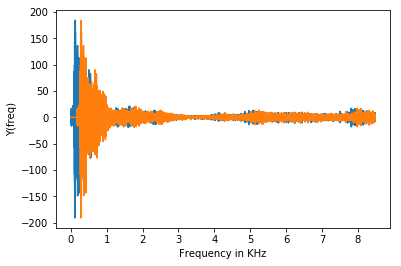

In [69]:
modify()
original_file = "../../data/dev-clean/1272/135031/1272-135031-0011.wav"
pitch_shift_file = "../../outputs/ps_output.wav"
freq_shift_file = "../../outputs/fs_output.wav"
pshift_fshift_file = "../../outputs/ps_fs_output.wav"

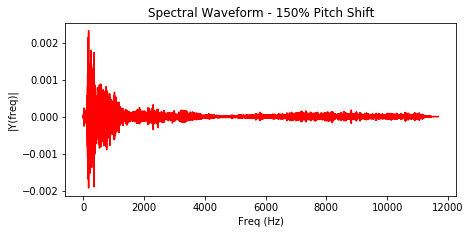

In [89]:
def plotSpectru(y,Fs):
    n = len(y) # lungime semnal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(n/2)] # one side frequency range

    Y = fft(y)/n # fft computing and normalization
    Y = Y[range(n/2)]

    plot(frq,(Y),'r') # plotting the spectrum
    xlabel('Freq (Hz)')
    ylabel('|Y(freq)|')

def plot_fre(filepath):
    rate,data=wavfile.read(filepath)
    y=data
    lungime=len(y)
    timp=len(y)/rate
    t=linspace(0,timp,len(y))
    
    plt.figure(figsize=(7, 7))
    subplot(2,1,2)
    plt.title("Spectral Waveform - 150% Pitch Shift");  
    plotSpectru(y,rate)
    show()
    
# plt.title("Original Spectral Waveform")
# plot_fre(original_file)
pitch_shift_file = "/home/anshul/data_science/Voice-Synthesizer/outputs/Voice_Generation/1 - Gender Based Transformation/ps_output_12_24.wav"
plot_fre(pitch_shift_file)
